In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install opencv-python opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 46.1 MB/s eta 0:00:00:00:0100:01


In [87]:
import cv2

In [42]:
from transformers import DetrImageProcessor, DetrForObjectDetection

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [43]:
import torch
from PIL import Image
import requests

In [160]:
#url = "https://inaturalist-open-data.s3.amazonaws.com/photos/272455433/original.jpg" # Cossus cossus
#url = "https://inaturalist-open-data.s3.amazonaws.com/photos/257942367/original.jpeg" # Valeria oleagina
url = "https://inaturalist-open-data.s3.amazonaws.com/photos/250068816/original.jpg" # monarch
#url = "https://inaturalist-open-data.s3.amazonaws.com/photos/254373129/original.jpg"
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#url = "https://www.birdguides-cdn.com/cdn/LegacyBirdguidesArticles/emperor-1.jpg"


image = Image.open(requests.get(url, stream=True).raw)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.1)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected umbrella with confidence 0.953 at location [186.13, 726.91, 1536.78, 1282.86]


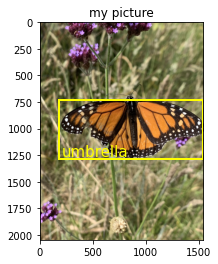

In [161]:
img = np.asarray(image) 

plt.imshow(img)
plt.title('my picture')

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = box.tolist()
    
    #top_left_x, top_left_y, bottom_right_x, bottom_right_y

    x0 = box[0] #bounding_box['x'] - bounding_box['width'] / 2
    x1 = box[2]
    y0 = box[1] #bounding_box['x'] + bounding_box['width'] / 2
    y1 = box[3]
    width = x1 - x0 #bounding_box['y'] - bounding_box['height'] / 2
    height = y1 - y0 # bounding_box['y'] + bounding_box['height'] / 2
    lab = model.config.id2label[label.item()]


    # specify the location of (left,bottom),width,height
    rect=mpatches.Rectangle((x0,y0),width,height, 
                            fill = False,
                            color = "yellow",
                            linewidth = 2)

    plt.gca().add_patch(rect)

    plt.text(x0+20, y0 + height - 20, lab, size = 15, fontdict=None, color="yellow")
plt.show()